In [2]:
cor = np.abs(data.corr()[['y']])
cor = cor.sort_values(by='y',ascending=False).head(6)[1:6]
cor.values # 상위 5개의 coeffcient 를 갖고오기 위해 
variable = ['Po1','Po2','GDP','Prob','Pop'] # 
coef = cor.values.flatten()
coef[3] = -coef[3] # Prob 은 절댓값이 4번쨰로 크지만 음의상관계수를 갖기때문에 원래 음수인 coefficency로 바꿔준다 바꿔주지않으면 양의 상관관계가 된다
coef
print(cor)
print(variable)

             y
Po1   0.687604
Po2   0.666714
GDP   0.441320
Prob  0.427422
Pop   0.337474
['Po1', 'Po2', 'GDP', 'Prob', 'Pop']


(2) Draw pairwise scatter plot – one scatter plot illustrates the relationship between the input variable selected in Question (1) and output target 

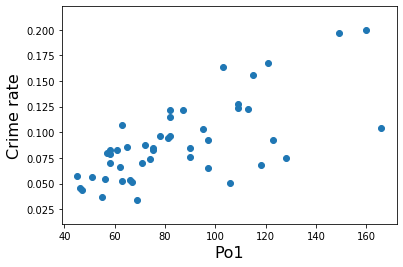

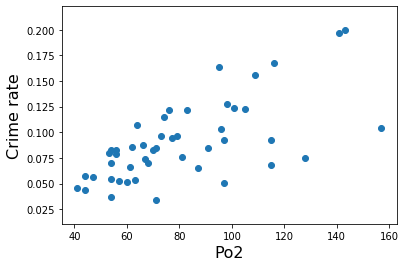

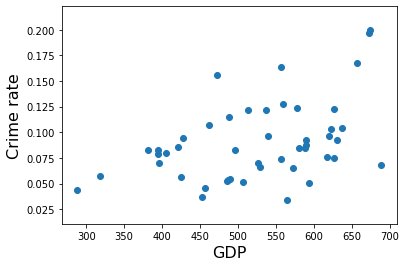

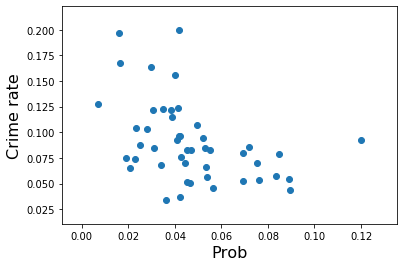

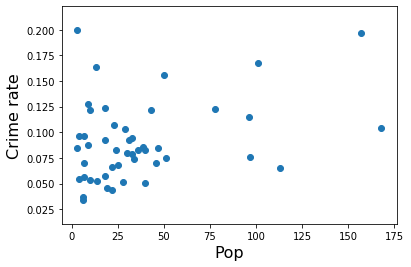

In [3]:
for i in variable:
    plt.scatter(data[i],data['y'])
    plt.xlabel(i , fontsize = 16)
    plt.ylabel('Crime rate' , fontsize =16)
    plt.show()

(3) Train a linear regression model (M1) using the selected variables in Question (1) and fill the following table. 

In [4]:
reg1 = LinearRegression()
reg1.fit(data[variable],data['y'])
X = data[variable].values
n,p = X.shape 
X = np.c_[np.ones(n),X]
XtX = np.matmul(X.T,X)
inv_XtX = np.linalg.inv(XtX)
beta = np.matmul(np.matmul(inv_XtX,X.T),data[['y']].values).flatten()

y_pred = np.matmul(X,beta)
y_true = data['y'].values

MSE = np.sum((y_true - y_pred)**2)/(n-p-1)

se2_beta = MSE*inv_XtX

M1 = pd.DataFrame(index = ['Coefficient','se_beta','t','p-value'], columns=['intercept','Po1','Po2','GDP','Prob','Pop'])

M1['intercept'] = [reg1.intercept_, np.sqrt(se2_beta[0,0]),beta[0]/np.sqrt(se2_beta[0,0]),(1-t.cdf(np.abs(beta[0]/np.sqrt(se2_beta[0,0])),n-p-1))*2]

list = []
for i in range(0,5):
    list.append(reg1.coef_[i])# coeffcient 값
    list.append(np.sqrt(se2_beta[i+1,i+1])) # se(베타)값
    list.append(beta[i+1]/np.sqrt(se2_beta[i+1,i+1]))
    list.append((1-t.cdf(np.abs(beta[i+1]/np.sqrt(se2_beta[i+1,i+1])),n-p-1))*2)# t값
    M1[variable[i]] =  list
    list = []
    
M1.transpose()

,Coefficient,se_beta,t,p-value
intercept,0.092288,0.034898,2.644528,0.011541
Po1,0.002625,0.001213,2.164665,0.036288
Po2,-0.001490,0.001294,-1.151786,0.256081
GDP,-0.000154,0.000075,-2.042297,0.047589
Prob,-0.413348,0.218330,-1.893227,0.065400
Pop,-0.000139,0.000130,-1.066865,0.292275


(4) Calculate VIF for the variables of M1. Given that multicollinearity is severe when there is a variable with a VIF value of greater than 10, find the most reasonable way to get a better model based on the calculated VIF values.  

In [5]:
VIF =pd.DataFrame(index = ['VIF'], columns=['Intercept','Po1','Po2','GDP','Prob','Pop'])
VIF2 =pd.DataFrame(index = ['VIF'], columns=['Intercept','Po1','GDP','Prob','Pop'])
variable = ['Po1','Po2','GDP','Prob','Pop']

reg1.fit(data[['Po1','Po2','GDP','Prob','Pop']] , data['y'])
r2 = reg1.score(data[['Po1','Po2','GDP','Prob','Pop']] , data[['y']])
VIF['Intercept'] = 1/(1-r2)

reg1.fit(data[['Po1','Po2','GDP','Prob']] , data['Pop'])
r2 = reg1.score(data[['Po1','Po2','GDP','Prob']] , data[['Pop']])
VIF['Pop'] = 1/(1-r2)

reg1.fit(data[['Po1','Po2','GDP','Pop']] , data['Prob'])
r2 = reg1.score(data[['Po1','Po2','GDP','Pop']] , data[['Prob']])
VIF['Prob'] = 1/(1-r2)

reg1.fit(data[['Po1','Po2','Prob','Pop']] , data['GDP'])
r2 = reg1.score(data[['Po1','Po2','Prob','Pop']] , data[['GDP']])
VIF['GDP'] = 1/(1-r2)

reg1.fit(data[['Po1','GDP','Prob','Pop']] , data['Po2'])
r2 = reg1.score(data[['Po1','GDP','Prob','Pop']] , data[['Po2']])
VIF['Po2'] = 1/(1-r2)

reg1.fit(data[['Po2','GDP','Prob','Pop']] , data['Po1'])
r2 = reg1.score(data[['Po2','GDP','Prob','Pop']] , data[['Po1']])
VIF['Po1'] = 1/(1-r2)

VIF.transpose()

reg1.fit(data[['Po1','GDP','Prob','Pop']] , data['y'])
r2 = reg1.score(data[['Po1','GDP','Prob','Pop']] , data[['y']])
VIF2['Intercept'] = 1/(1-r2)

reg1.fit(data[['GDP','Prob','Pop']],data['Po1'])
r2 = reg1.score(data[['GDP','Prob','Pop']],data[['Po1']])
VIF2['Po1'] = 1/(1-r2)

reg1.fit(data[['Po1','GDP','Prob']],data['Pop'])
r2 = reg1.score(data[['GDP','Prob','Po1']],data[['Pop']])
VIF2['Pop'] = 1/(1-r2)

reg1.fit(data[['GDP','Po1','Pop']],data['Prob'])
r2 = reg1.score(data[['GDP','Po1','Pop']],data[['Prob']])
VIF2['Prob'] = 1/(1-r2)

reg1.fit(data[['Po1','Prob','Pop']],data['GDP'])
r2 = reg1.score(data[['Po1','Prob','Pop']],data[['GDP']])
VIF2['GDP'] = 1/(1-r2)

VIF.transpose() # this is values of VIF of 5 variables 
VIF2.transpose() # this is. alues of VIF of 4 variables except Po2



,VIF
Intercept,2.186715
Po1,3.438328
GDP,3.187330
Prob,1.524200
Pop,0.000001


(5) Based on the way you provide in Question (4), train a new regression model (M2) and fill the following table. 

In [6]:
reg2 = LinearRegression()
reg2.fit(data[['Po1','GDP','Prob','Pop']],data['y'])

X2 = data[['Po1','GDP','Prob','Pop']].values
n2,p2 = X2.shape
X2 = np.c_[np.ones(n2),X2]
XtX2 = np.matmul(X2.T,X2)
inv_XtX2 = np.linalg.inv(XtX2)

beta = np.matmul(np.matmul(inv_XtX2,X2.T),data[['y']].values).flatten()

y_pred2 = np.matmul(X2,beta)
y_true2 = data['y'].values

MSE2 = np.sum((y_true2 - y_pred2)**2)/(n2-p2-1)

se2_beta = MSE2*inv_XtX2
M2 = pd.DataFrame(index = ['Coefficient','se_beta','t','p-value'], columns=['intercept','Po1','GDP','Prob','Pop'])

variable2 = ['Po1','GDP','Prob','Pop']

M2['intercept'] = [reg2.intercept_, np.sqrt(se2_beta[0,0]),beta[0]/np.sqrt(se2_beta[0,0]),(1-t.cdf(np.abs(beta[0]/np.sqrt(se2_beta[0,0])),n2-p2-1))*2]

list = []
for i in range(0,4):
    list.append(reg2.coef_[i])# coeffcient value
    list.append(np.sqrt(se2_beta[i+1,i+1])) # se(베타) value
    list.append(beta[i+1]/np.sqrt(se2_beta[i+1,i+1])) # tvalue
    list.append((1-t.cdf(np.abs(beta[i+1]/np.sqrt(se2_beta[i+1,i+1])),n2-p2-1))*2)# pvalue
    M2[variable2[i]] =  list
    list = []
    
    
M2.transpose()



,Coefficient,se_beta,t,p-value
intercept,0.095805,0.034899,2.745225,0.008861
Po1,0.001258,0.000252,4.997391,0.000011
GDP,-0.000167,0.000075,-2.237750,0.030599
Prob,-0.418255,0.219135,-1.908660,0.063155
Pop,-0.000130,0.000130,-0.999677,0.323192


(7) Apply the F-test on M1 and M2 and explain the results. In addition, fill the following tables

In [7]:
reg1 = LinearRegression()
reg1.fit(data[variable],data['y'])

y_true1 = data['y'].values
y_pred1 = reg1.predict(data[['Po1','Po2','GDP','Prob','Pop']])

SST1 = sum((y_true1 - np.mean(y_true1))**2)
SSE1 = sum((y_true1 - y_pred1)**2)
SSR1 = sum((y_pred1 - np.mean(y_true1))**2)

n1,p1 = data[variable].shape

MSE1 = SSE1 / (n1-p1-1)
MSR1 = SSR1 /p1
f1 = MSR1/MSE1

pvalue1 = 1-f.cdf(f1,p1,n1-p1-1)

print("------------------------------Model 1-----------------------------------")
print("SSE :" , SSE1 , "\nP : " , p1,  "\nMSR : ",  MSR1 ,"\nf :" ,f1 ,"\npvalue :", pvalue1)
print("SSR :" , SSR1,  "\nn-p-1 :", (n1-p1-1), '\nMSE :', MSE1)
print("SST :" , SST1,  "\nn-1 :", (n1-1))

reg2 = LinearRegression()
reg2.fit(data[variable2],data['y'])

y_true2 = data['y'].values
y_pred2 = reg2.predict(data[['Po1','GDP','Prob','Pop']])

SST2 = sum((y_true2 - np.mean(y_true2))**2)
SSE2 = sum((y_true2 - y_pred2)**2)
SSR2 = sum((y_pred2 - np.mean(y_true2))**2)

n2,p2 = data[variable2].shape

MSE2 = SSE2 / (n2-p2-1)
MSR2 = SSR2 /p2
f2 = MSR2/MSE2

pvalue2 = 1-f.cdf(f2,p2,n2-p2-1)


print("\n------------------------------Model 2-----------------------------------")
print("SSE :" , SSE2 , "\nP : " , p2,  "\nMSR : ",  MSR2 ,"\nf :" ,f2 ,"\npvalue :", pvalue2)
print("SSR :" , SSR2,  "\nn-p-1 :", (n2-p2-1), '\nMSE :', MSE2)
print("SST :" , SST2,  "\nn-1 :", (n2-1))



------------------------------Model 1-----------------------------------
SSE : 0.030480713807041322 
P :  5 
MSR :  0.007665712557740585 
f : 10.311248511337658 
pvalue : 1.8875302661980342e-06
SSR : 0.038328562788702926 
n-p-1 : 41 
MSE : 0.0007434320440741786
SST : 0.06880927659574469 
n-1 : 46

------------------------------Model 2-----------------------------------
SSE : 0.031466958249343015 
P :  4 
MSR :  0.009335579586600168 
f : 12.460509831622934 
pvalue : 9.071188887821435e-07
SSR : 0.03734231834640067 
n-p-1 : 42 
MSE : 0.0007492132916510242
SST : 0.06880927659574469 
n-1 : 46


(8) Calculate R^2 and adjusted R^2 for M1 and M2. Then, compare two models. 

In [8]:
reg1.fit(data[variable],data['y'])
r21 = reg1.score(data[variable],data['y']) # reg1 is LinearRegression For M1
adjust_r21 = 1 -((n1-1)/(n1-p1-1))*(1-r21)

print("------------------------------Model 1-----------------------------------")
print('\nR^2 :', r21, '\nadjust_R^2 :', adjust_r21,'\n')

reg1.fit(data[variable2],data['y'])
r22 = reg2.score(data[variable2],data['y']) # reg1 is LinearRegression For M1
adjust_r22 = 1 -((n2-1)/(n2-p2-1))*(1-r22)

print("------------------------------Model 2-----------------------------------")
print('\nR^2 :', r22, '\nadjust_R^2 :', adjust_r22)

------------------------------Model 1-----------------------------------

R^2 : 0.5570260971334449 
adjust_R^2 : 0.5030048894667918 

------------------------------Model 2-----------------------------------

R^2 : 0.5426930814254629 
adjust_R^2 : 0.49914004156122127


(9) Calculate residuals of M1 and draw scatter plots to show relationship between one of the input variables and residuals. 

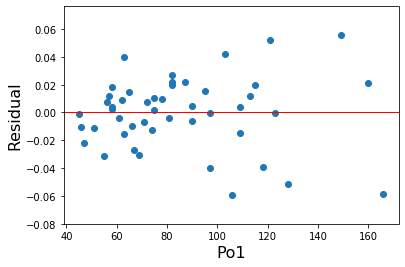

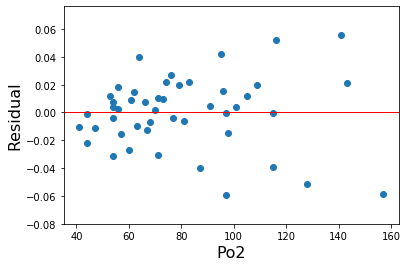

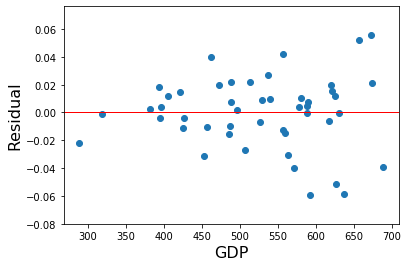

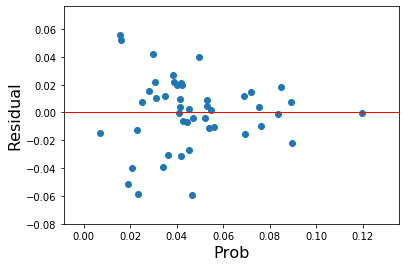

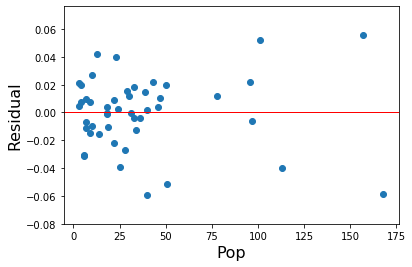

In [9]:
residual1 = y_true1 - y_pred1
for i in variable:
    plt.scatter(data[i],residual1)
    plt.xlabel(i , fontsize = 16)
    plt.ylabel('Residual' , fontsize =16)
    plt.axhline(y=0.00, color='r', linewidth=1)
    plt.show()

(10) Do residuals of M1 and M2 follow the normal distribution based on the Jarque–Bera test? (significance level is 0.05). 

In [10]:
residual1 = y_true1 - y_pred1
residual2 = y_true2 - y_pred2

# 귀무가설 : skewness = Kurtosis - 3 = 0 이다.

S1 = skew(residual1)
C1 = kurtosis(residual1, fisher=False)

JB1 = ((n1-p1)/6)*(S1**2 + (C1-3)**2/4)

chi2.cdf(JB1,df=2)

S2 = skew(residual2)
C2 = kurtosis(residual2, fisher=False)

JB2 = ((n2-p2)/6)*(S2**2 + (C2-3)**2/4)


Pvalue1 = 1-chi2.cdf(JB1,df = 2)
Pvalue2 = 1- chi2.cdf(JB2,df = 2)

print("p-value of M1 : ", Pvalue1 )
print("p-value of M2 :", Pvalue2 )


p-value of M1 :  0.7079936135927738
p-value of M2 : 0.42260579692833145


(11) Do residuals of M1 and M2 satisfy homoskedasticty based on the Breusch–Pagan test? (significance level is 0.05) 

In [11]:
X1 = data[['Po1','Po2','GDP','Prob','Pop']].values
n1,p1 = X1.shape
reg1.fit(X1,residual1**2)
res_pred1 = reg1.predict(X1)
res_e21 = residual1**2 -res_pred1

SSE1 = sum(res_e21**2)
SSR1 = sum((res_pred1-np.mean(residual1**2))**2)

MSE1 = SSE1/(n1-p1-1)
MSR1 = SSR1/p1

f1 = MSR1/MSE1

pvalue1= 1 - f.cdf(f1,p1,n1-p1-1)

X2 = data[['Po1','GDP','Prob','Pop']].values
reg2.fit(X2,residual2**2)
res_pred2 = reg2.predict(X2)
res_e22 = residual2**2 - res_pred2
n2,p2 = X2.shape

SSE2 = sum(res_e22**2)
SSR2 = sum((res_pred2-np.mean(residual2**2))**2)

MSE2 = SSE2/(n2-p2-1)
MSR2 = SSR2/p2

f2 = MSR2/MSE2


pvalue2=1 - f.cdf(f2,p2,n2-p2-1)

print("p-value of M1 : ", pvalue1 )
print("p-value of M2 :", pvalue2 )

p-value of M1 :  2.209001834097002e-05
p-value of M2 : 2.7261145944201814e-05


# 2. Logistic regression

Using the MAGIC Gamma Telescope data set, build a classifier through logistic regression.

The included variabes in this dataset are as follows. 
1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background)
    - g is treated as class 1 while h is treated as class 0

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# data load
magic=pd.read_csv('https://drive.google.com/uc?export=download&id=1AoCh22pmLHhdQtYdYUAJJqOCwF9obgVO', sep='\t')

X=magic[magic.columns[:-1]].values
y=magic['class'].values

# data partition
trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)

(1) Using MAGIC Gamma Telescope data set, calculate accuracy with varying cutoff for the final decision. cutoff ∈{0.1,0.15,0.2,0.25,…,0.95}. Draw a line plot (x=cutoff, y=accuracy). For this problem, the model is trained using trnX and accuracy is calculated using valX.

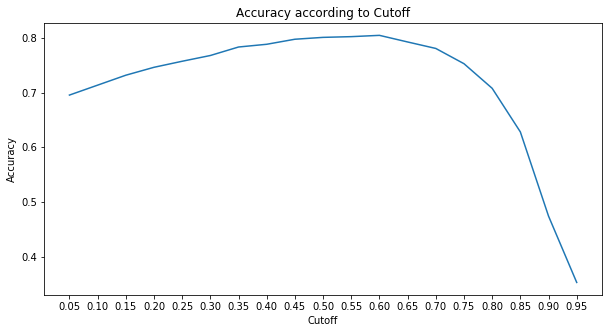

In [3]:
Logic = LogisticRegression(max_iter=1000) # max_iter 
Logic.fit(trnX,trnY)
y_prob = Logic.predict_proba(valX) # by probablity classifiy
y_pred = Logic.predict(valX)
A=Logic.score(valX,valY) # This is fixed treshold (cutoff) = 0.5

cutoff = []
for i in range(5,100,5):
    cutoff.append(i/100)

Accuracy = []
for i in range(len(cutoff)):
    Num = 0 # for reset Number of correctly predicted samples
    for j in range(len(valX)):
        if y_prob[j][0] >=cutoff[i]:
            y_pred[j] = 'g'
        elif y_prob[j][0] <cutoff[i]:
            y_pred[j] = 'h'
            
        if y_pred[j] == valY[j]:
            Num=Num+1
    Accuracy.append(Num/len(valX))
    y_pred = Logic.predict(valX) # for reset y_pred

plt.figure(figsize=(10,5))
plt.plot(cutoff,Accuracy)
plt.title('Accuracy according to Cutoff')
plt.xlabel('Cutoff')
plt.ylabel('Accuracy')
plt.xticks(cutoff)

plt.show()


In [14]:
Logic = LogisticRegression(max_iter=1000) # max_iter 
Logic.fit(trnX,trnY)
len(trnX) , len(trnY)
trnX[0],trnY[0]
y_prob = Logic.predict_proba(trnX) # by probablity classifiy
y_pred = Logic.predict(trnX)

len(magic.columns),len(Logic.coef_.flatten()),len(Logic.intercept_.flatten())
n,p = X.shape
MX = np.c_[np.ones(n),X]
coef = Logic.coef_.transpose()
intercept = Logic.intercept_.flatten()

MX

array([[  1.    ,  28.7967,  16.0021, ...,  -8.2027,  40.092 ,  81.8828],
       [  1.    ,  31.6036,  11.7235, ...,  -9.9574,   6.3609, 205.261 ],
       [  1.    , 162.052 , 136.031 , ..., -45.216 ,  76.96  , 256.788 ],
       ...,
       [  1.    ,  75.4455,  47.5305, ...,  -9.4662,  30.2987, 256.5166],
       [  1.    , 120.5135,  76.9018, ..., -63.8389,  84.6874, 408.3166],
       [  1.    , 187.1814,  53.0014, ...,  31.4755,  52.731 , 272.3174]])

In [16]:
prob_g = Logic.predict_proba(valX)[:,0]
set_Y = []
for i in cutoff:
    cutoff_Y = ['g' if j>=i else 'h' for j in prob_g]
    set_Y.append(cutoff_Y)

acc_Y = []
for i in set_Y:
    accuracy_Y = Logic.score(valX,i)
    print(accuracy_Y)

0.7715562565720294
0.7912723449001051
0.8115141955835962
0.8380651945320715
0.8622502628811777
0.8937960042060988
0.9208727655099895
0.9500525762355415
0.9776550998948476
1.0
0.9729232386961093
0.9421661409043113
0.9048370136698213
0.860410094637224
0.8031019978969506
0.7250262881177708
0.6054153522607781
0.4227129337539432
0.27891692954784436
